## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
print(mouse_metadata)
print(study_results)
combined_data = pd.merge(mouse_metadata,study_results,how = 'outer',on="Mouse ID")
print(combined_data.head(20))

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Make a dataframe of regimen and tumor volume
#Group by the regimen and get the count for each volume 
#Get the statistics from the different regimens
#Store them into a summmary dataframe

tumor_data = combined_data[["Drug Regimen","Tumor Volume (mm3)"]]
regimen_group = tumor_data.groupby("Drug Regimen")
regimen_count = regimen_group["Drug Regimen"].count()
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
print(regimen_mean)
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
print(regimen_median)
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
print(regimen_var)
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
print(regimen_std)
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()
print(regimen_sem)

summary_df =pd.DataFrame({"Mean":regimen_mean,"Median":regimen_median,"Variance":regimen_var,"St. Dev":regimen_std,"Standard Error":regimen_sem})
summary_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

,Mean,Median,Variance,St. Dev,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

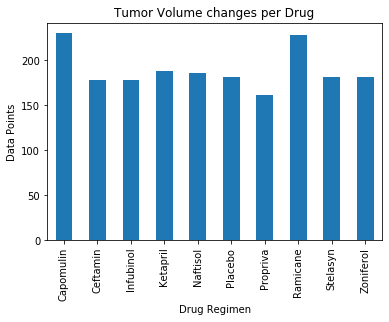

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Use the previously made dataframes for each regimen to get the name of each regimen, and the number of data points
#Use regimen as the x-axis of the plot, number of data points as the y-axis label
#Using DataFrame.plot(), plot the regimen vs the data points

regimen_chart = regimen_count.plot(kind = "bar")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Data Points")
regimen_chart.set_title("Tumor Volume changes per Drug")

#Add more room on the axes, make the graph look prettier


plt.show()
plt.tight_layout()

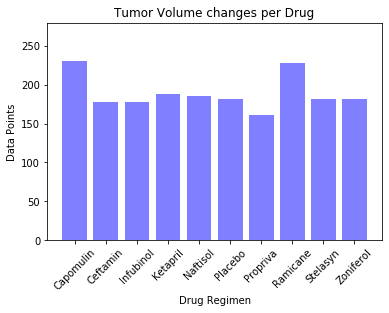

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Store the regimen names and data points per regimen in their own separate variables
#Use pyplot to make the bar chart
#Label the chart the same as the other one

x_axis = np.arange(len(regimen_count))
plt.bar(x_axis,regimen_count,color="b",alpha = .5,align ="center")
tick_locations = [value for value in x_axis]
drug_axis = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations,drug_axis,rotation = 45)

plt.ylim(0,max(regimen_count)+50)
plt.title("Tumor Volume changes per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()



## Pie plots

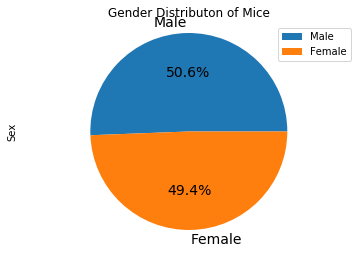

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Make a dataframe of the data looking at the gender of the mice
#Using DataFrame.plot(), make a pie chart of female vs male mice
gender_df = combined_data["Sex"].value_counts()

gender_df.plot(kind = "pie", legend = True, title = "Gender Distributon of Mice",autopct='%1.1f%%',fontsize = 14)
plt.axis('equal')
plt.show()

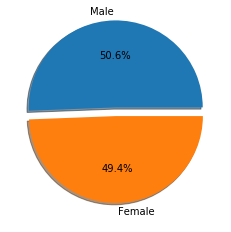

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Get the total number of male mice and female mice, and store them in a list
#Store the gender names in a list
#Use pyplot to make the pie chart
explode = (.1,0)
label = ["Male","Female"]

plt.pie(gender_df,explode=explode,labels=label,autopct="%1.1f%%",shadow=True,startangle=0)
plt.show()

## Quartiles, outliers and boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Create four dataframes of just the top drugs
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] =="Capomulin"]
ramicane_data = combined_data.loc[combined_data["Drug Regimen"] =="Ramicane"]
infubinol_data = combined_data.loc[combined_data["Drug Regimen"] =="Infubinol"]
ceftamin_data = combined_data.loc[combined_data["Drug Regimen"] =="Ceftamin"]


fin_capomulin_data = capomulin_data.loc[capomulin_data["Timepoint"] ==45]
fin_ramicane_data = ramicane_data.loc[ramicane_data["Timepoint"] ==45]
fin_infubinol_data = infubinol_data.loc[infubinol_data["Timepoint"] ==45]
fin_ceftamin_data = ceftamin_data.loc[ceftamin_data["Timepoint"] ==45]
print(fin_capomulin_data)

quartiles_cap = fin_capomulin_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_ram = fin_ramicane_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_inf = fin_infubinol_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_cef = fin_ceftamin_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq_cap = quartiles_cap[.25]
upperq_cap = quartiles_cap[.75]
iqr_cap = upperq_cap - lowerq_cap

lowerq_ram = quartiles_ram[.25]
upperq_ram = quartiles_ram[.75]
iqr_ram = upperq_ram - lowerq_ram

lowerq_inf = quartiles_inf[.25]
upperq_inf = quartiles_inf[.75]
iqr_inf = upperq_inf - lowerq_inf

lowerq_cef = quartiles_cef[.25]
upperq_cef = quartiles_cef[.75]
iqr_cef = upperq_ram - lowerq_cef

print(f"The lower quartile of the final volume is: {lowerq_cap}")
print(f"The upper quartile of the final volume is: {upperq_cap}")
print(f"The interquartile range of the final volume is: {iqr_cap}")
print(f"The median of final volume is: {quartiles_cap[0.5]} ")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers")
print(f"Values above {upper_bound_cap} could be outliers")



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
19      s185    Capomulin  Female           3          17         45   
29      x401    Capomulin  Female          16          15         45   
39      m601    Capomulin    Male          22          17         45   
104     u364    Capomulin    Male          18          17         45   
124     y793    Capomulin    Male          17          17         45   
134     r554    Capomulin  Female           8          17         45   
144     m957    Capomulin  Female           3          19         45   
164     t565    Capomulin  Female          20          17         45   
204     i738    Capomulin  Female          23          20         45   
224     w914    Capomulin    Male          24          21         45   
244     g288    Capomulin    Male           3          19         45   
282     l897    Capomulin    Male          17          19         45   
299     b742    Capomulin    Male           7          21       

# Old Data
#Combine the dataframes into one
top_drugs = capomulin_data.append(ramicane_data)
top_drugs = top_drugs.append(infubinol_data)
top_drugs = top_drugs.append(ceftamin_data)

#Get the relevant data to be used
top_drugs = top_drugs[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
print(top_drugs)

#grouped_top_drugs = top_drugs.groupby(['Mouse ID','Drug Regimen'])
#final_volumes = grouped_top_drugs["Tumor Volume (mm3)"].last()
final_volumes = top_drugs.loc[top_drugs["Timepoint"] == 45]
print(final_volumes)
#quartiles = final_volumes.quantile([.25,.5,.75])
quartiles = final_volumes["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of the final volume is: {lowerq}")
print(f"The upper quartile of the final volume is: {upperq}")
print(f"The interquartile range of the final volume is: {iqr}")
print(f"The median of final volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

outlier = False
for x in final_volumes["Tumor Volume (mm3)"]:
    if (x < lower_bound) | (x > upper_bound):
        print(f"{x} is an outlier")
        outlier = True
if outlier == False:
    print("There are no outliers.")
    
outliers = final_volumes.loc[(final_volumes["Tumor Volume (mm3)"] < lower_bound) | (final_volumes["Tumor Volume (mm3)"] > upper_bound)]
outliers
#final_volumes = final_volumes["Tumor Volume (mm3)"]
#final_volumes
#final_volume = grouped_data["Tumor Volume (mm3)"].last()
#final_volume

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen